# Прогнозирование типа лекарственного препарата
----

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("drugs.csv")

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
# небольшая нормализация данных
df = df.replace({'Sex' :{'F':0, 'M':1},
                'Cholesterol': {'NORMAL': 0, 'HIGH': 1},
                'BP': {'LOW':0, 'NORMAL':1, 'HIGH':2},
                'Drug':{'drugA':0, 'drugB':1, 'drugC':2, 'drugX':3, 'DrugY':4}})

In [6]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4
...,...,...,...,...,...,...
195,56,0,0,1,11.567,2
196,16,1,0,1,12.006,2
197,52,1,1,1,9.894,3
198,23,1,1,0,14.020,3


In [7]:
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,-0.120918,0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.044952,0.008811,-0.125008,-0.098573
BP,-0.120918,-0.044952,1.000000,-0.032208,0.036871,-0.328665
Cholesterol,0.068234,0.008811,-0.032208,1.000000,-0.010000,-0.055629
Na_to_K,-0.063119,-0.125008,0.036871,-0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,-0.328665,-0.055629,0.589120,1.000000


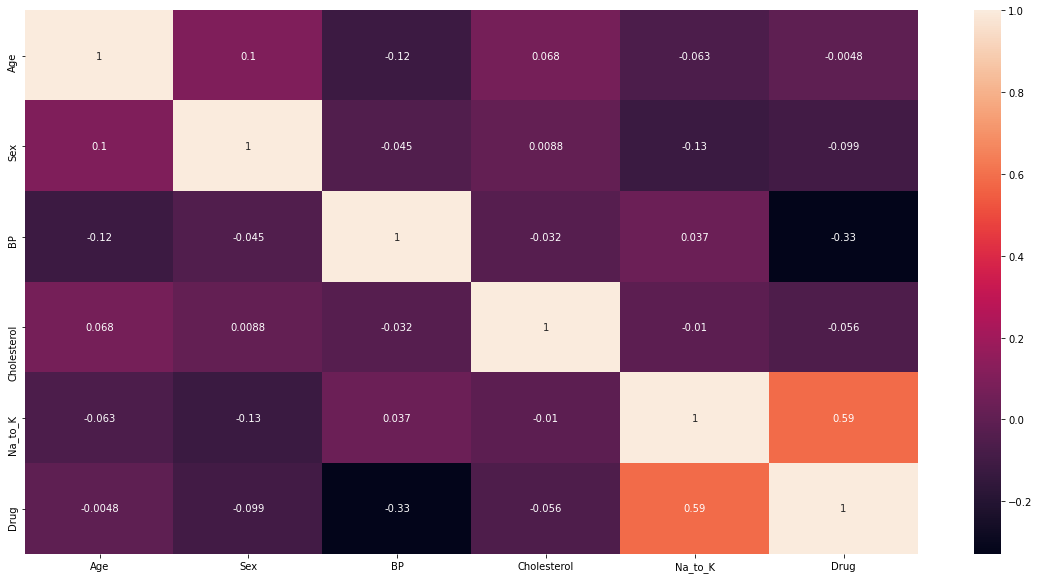

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)

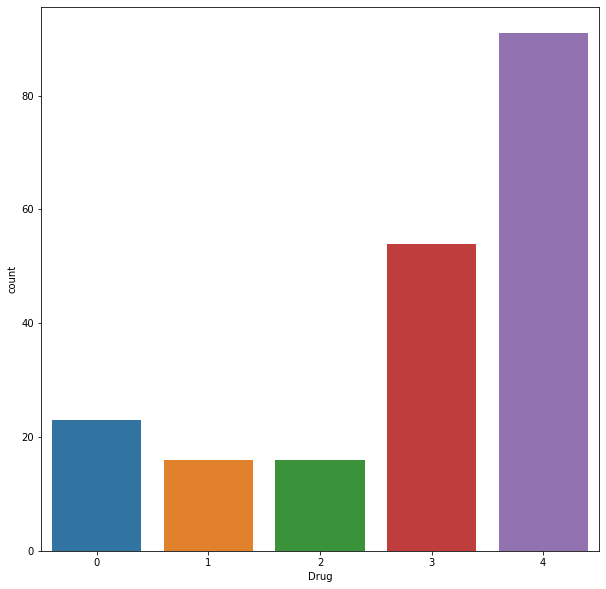

In [9]:
plt.figure(figsize = (10, 10))
sns.countplot(df["Drug"])

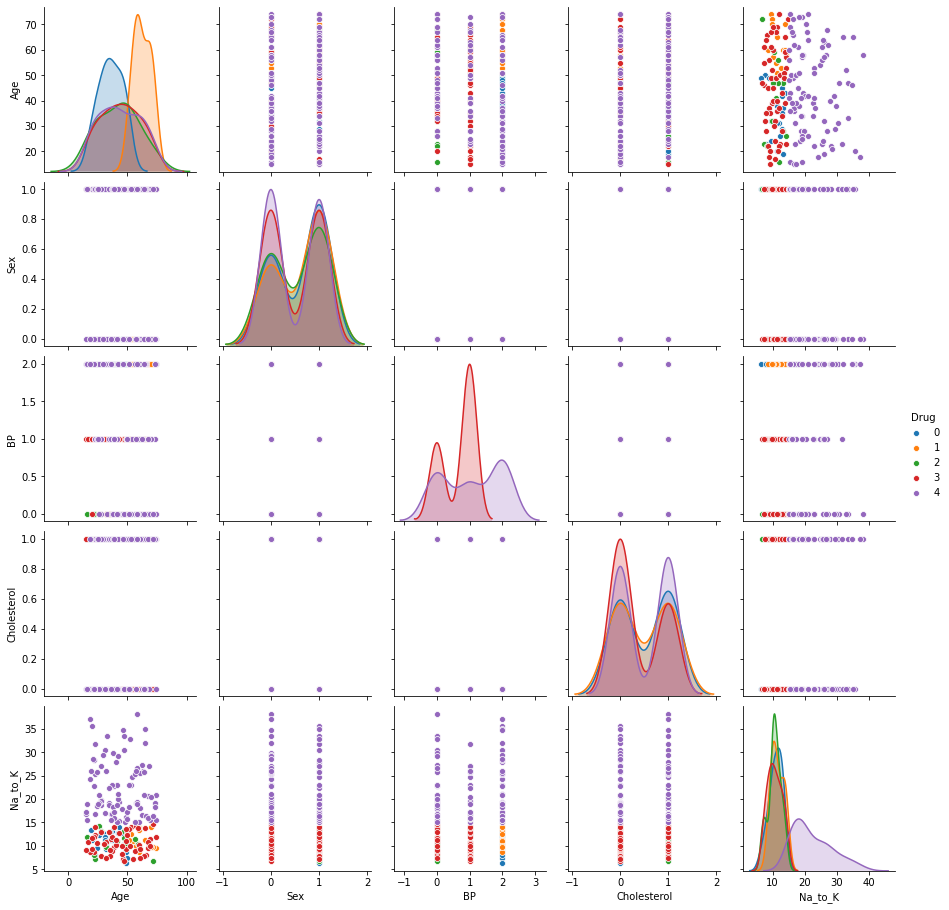

In [10]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
%matplotlib inline
sns.pairplot(df, hue = "Drug")

In [11]:
X = df.drop(columns = "Drug", axis=1)
y = df['Drug']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

Поскольку данных для обучения очень мало, для тестовой выборки отводится `20%` всех данных. Это сделано для максимального упора на тренировку. При уменьшении до `10%` для тестовой выборки точность прогнозирования падает, поскольку некоторые типы медикаментов просто не попадают в выборку. 

## XGBClassifier

In [13]:
import warnings
warnings.filterwarnings("ignore")

In [14]:
from sklearn.metrics import classification_report

In [15]:
from xgboost import XGBClassifier, plot_importance
xgb = XGBClassifier(verbosity = 0)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

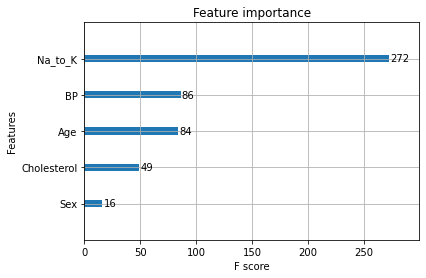

In [16]:
plot_importance(xgb)

In [17]:
print("Train: ", xgb.score(X_train, y_train))
print("Test: ", xgb.score(X_test, y_test))

Train:  1.0
Test:  0.975


In [18]:
print(classification_report(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      0.83      0.91         6
           3       0.90      1.00      0.95         9
           4       1.00      1.00      1.00        16

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



Точность предсказания с использованием метода `XGBoost` достигает 95% - 100%

## KNeighborsClassifier 3/6/9

In [19]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = [3,6,9]
train_results = []
test_results = []
for neig in neighbors:
    kn = KNeighborsClassifier(n_jobs = -1, n_neighbors = neig)
    kn.fit(X_train, y_train)
    train_results.append(kn.score(X_train, y_train))
    test_results.append(kn.score(X_test, y_test))

In [20]:
print("Train: ", train_results)
print("Test: ", test_results)

Train:  [0.825, 0.8125, 0.775]
Test:  [0.65, 0.55, 0.5]


In [21]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,4
1,47,1,0,1,13.093,2
2,47,1,0,1,10.114,2
3,28,0,1,1,7.798,3
4,61,0,0,1,18.043,4


In [22]:
import numpy as np
to_preds = np.array([[54,1,1,1,10]])
to_preds1 = np.array([[54,1,1,1,30.3]])
kn_preds = kn.predict(to_preds)
kn_preds1 = kn.predict(to_preds1)
print("Drug predict 1: Na - 10", kn_preds)
print("Drug predict 2: Na - 30", kn_preds1)

Drug predict 1: Na - 10 [3]
Drug predict 2: Na - 30 [4]


In [23]:
print (classification_report(y_test, kn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.14      0.17      0.15         6
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         6
           3       0.30      0.67      0.41         9
           4       1.00      0.81      0.90        16

    accuracy                           0.50        40
   macro avg       0.29      0.33      0.29        40
weighted avg       0.49      0.50      0.47        40



Точность предсказания с использованием метода `KNeighbors` достигает 50% - 60%

## DecisionTree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Train: ", dt.score(X_train, y_train))
print("Test: ", dt.score(X_test, y_test))

Train:  1.0
Test:  1.0


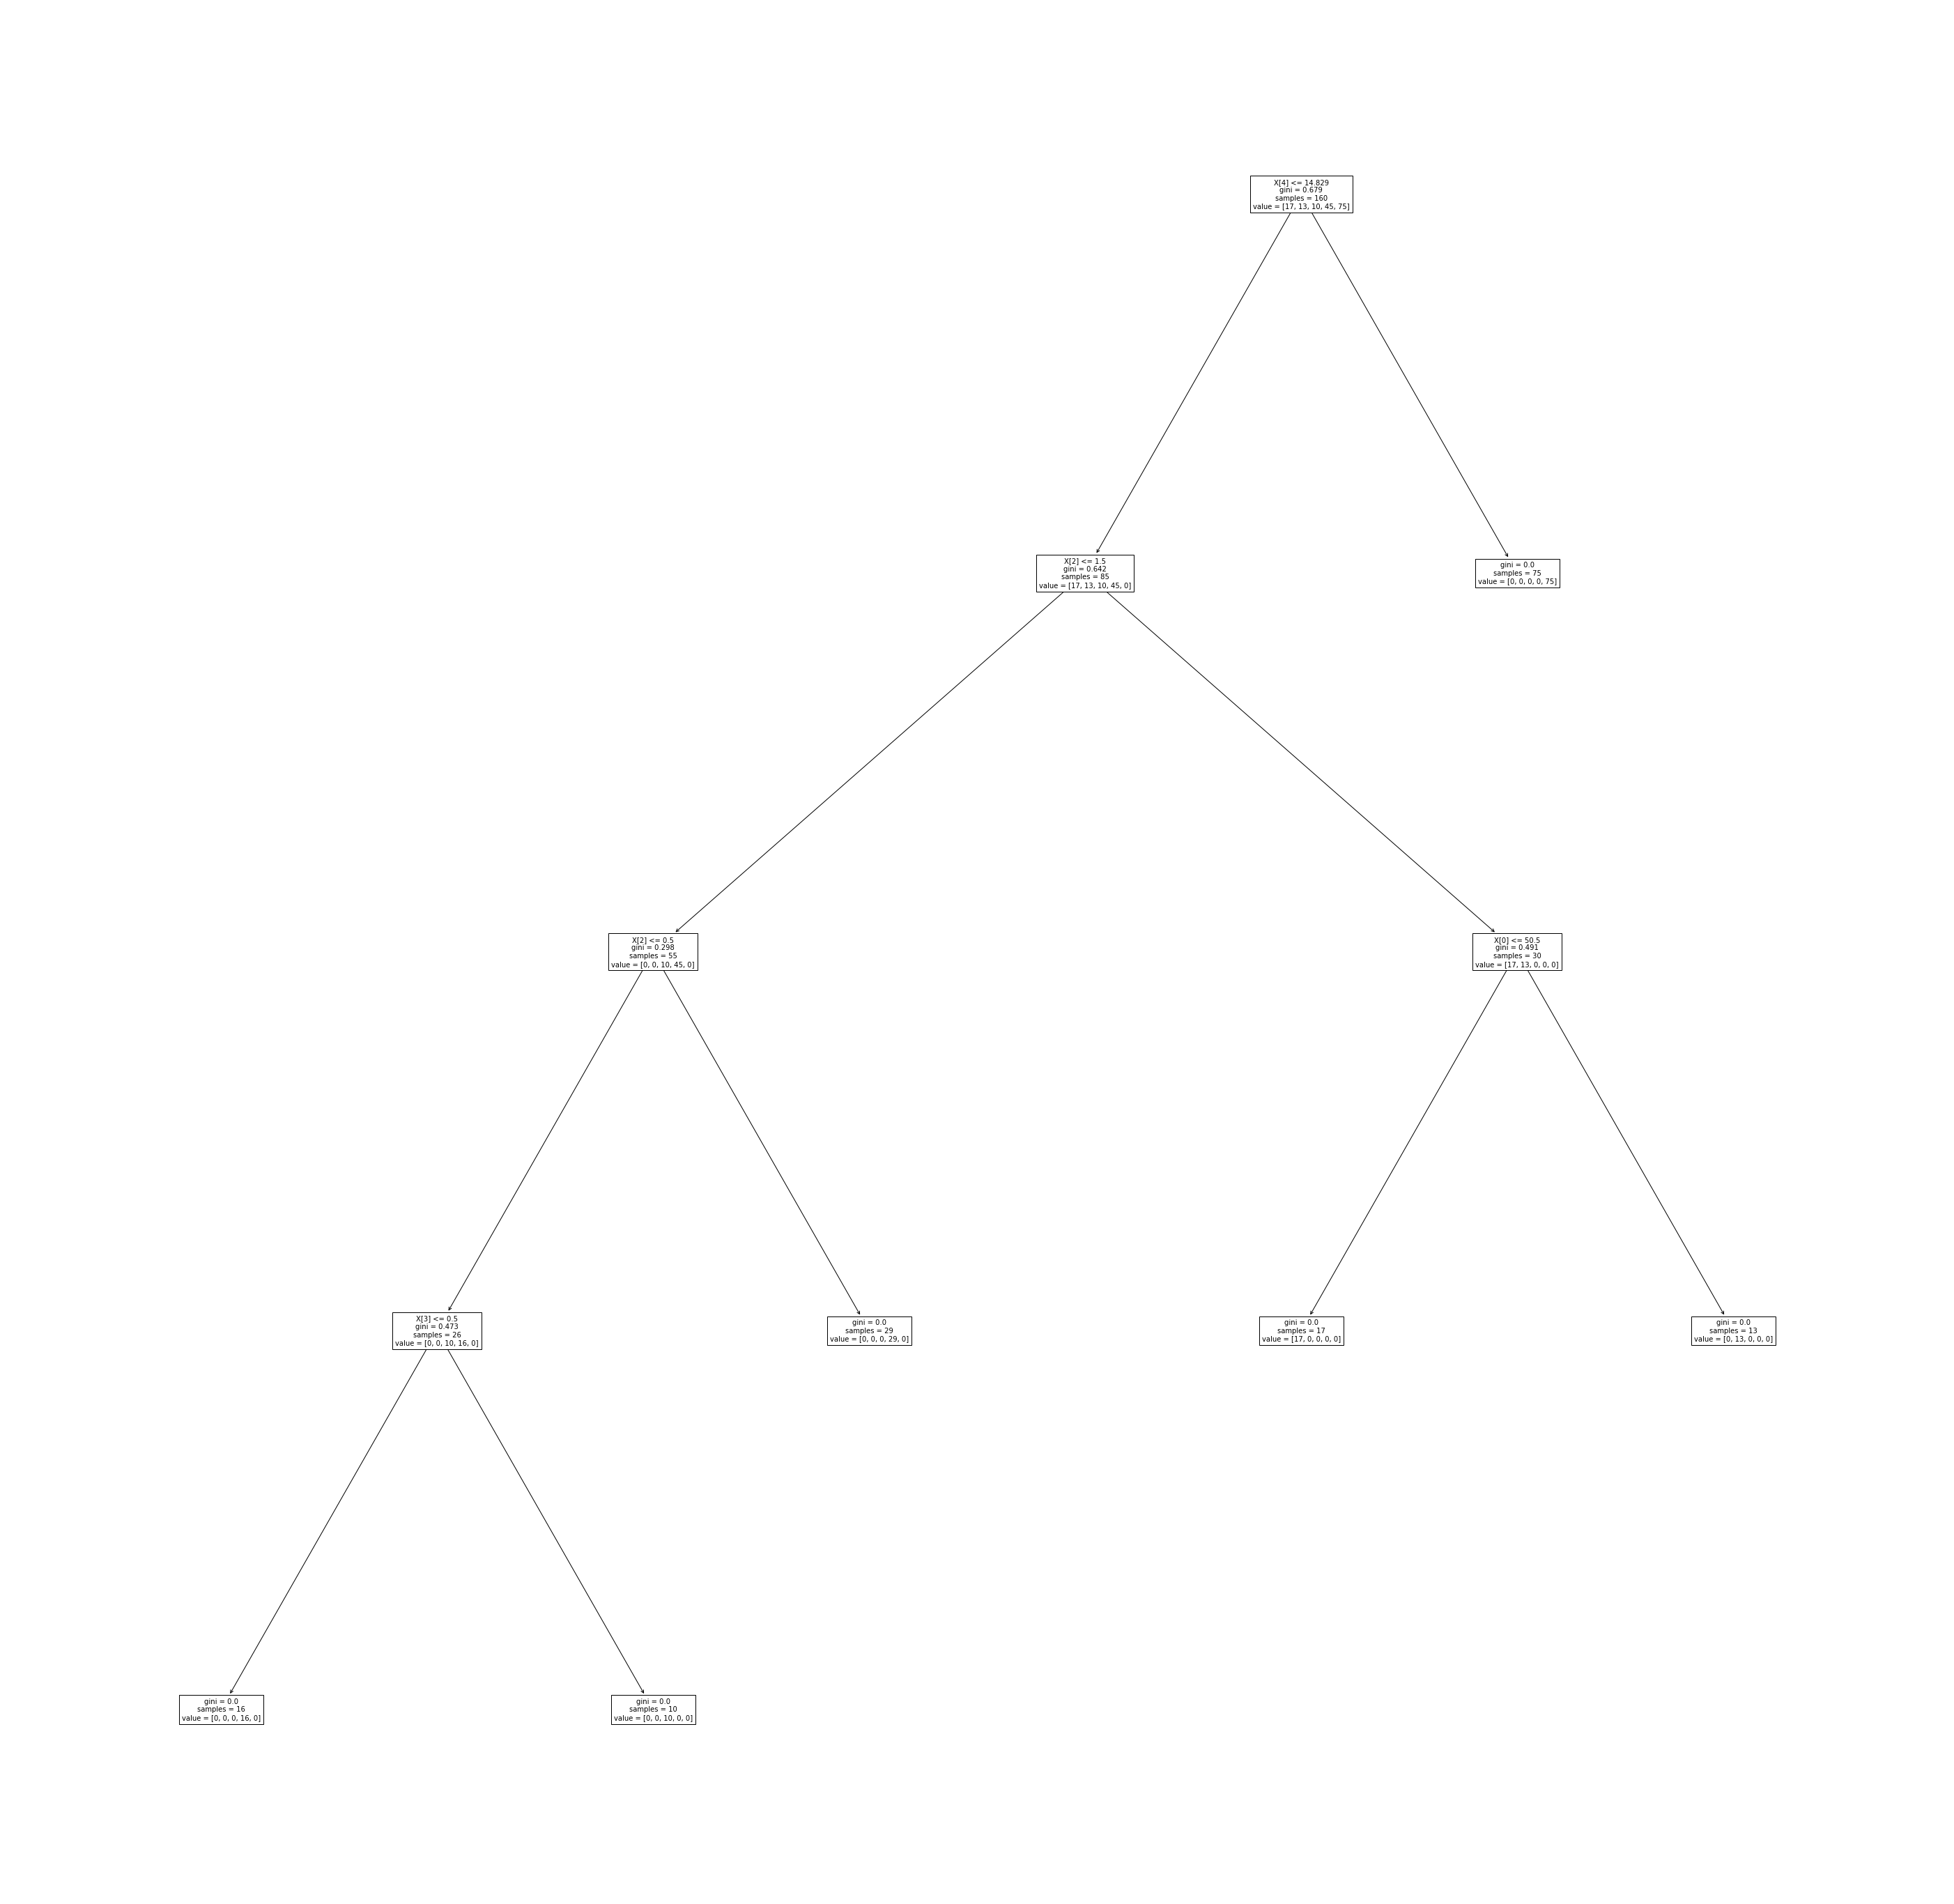

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize = (50,50))
plot_tree(dt, fontsize = 10)
plt.show()

In [26]:
print (classification_report(y_test, dt.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         9
           4       1.00      1.00      1.00        16

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



Точность предсказания с использованием метода `DecisionTree` достигает 95% - 98%

В среднем, все три модели показали неплохой результат прогнозирования. Лучшие показатели у методов `XGBoost` и `DecisionTree` с результатом обучения 95 - 100%